Dane wykorzystane do zadania: "dane3"

In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_lg
import spacy as sp
nlp = sp.load("pl_core_news_lg")

In [1]:
import pandas as pd
import numpy
import matplotlib as plt

In [30]:
df_dane = pd.read_csv("/content/dane3.csv")

In [ ]:
print(df_dane["created_at"].to_string())
# print(df_dane.dtypes)

Część 1 - przetwarzanie i oczyszczanie danych

In [ ]:
# potrzebne do zadania funkcje, listy i inne
def pl_names(name): # funkcja do zmiany nazw dni tygodnia na pl
  if name[0:3] == "Mon":
    return name.replace("Mon","Poniedziałek")
  elif name[0:3] == "Tue":
    return name.replace("Tue","Wtorek")
  elif name[0:3] == "Wed":
    return name.replace("Wed","Środa")
  elif name[0:3] == "Thu":
    return name.replace("Thu","Czwartek")
  elif name[0:3] == "Fri":
    return name.replace("Fri","Piątek")
  elif name[0:3] == "Sat":
    return name.replace("Sat","Sobota")
  elif name[0:3] == "Sun":
    return name.replace("Sun","Niedziela")

months = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', "Oct": '10', 'Nov': '11', 'Dec': '12'}
def moth_changer(month): # funkcja do zmiany nazw miesięcy na liczby
  for key,value in months.items():
    is_this_month = month.find(key)
    if is_this_month == -1:
      pass
    else:
      return month.replace(key,value)
def text_without_stopwords(text): # funkcja do usuwanie stopwordów
  doc = nlp(text)
  ls = []
  for token in doc:
    if not token.is_stop:
        ls.append(token.text)
  return " ".join(ls)
tweet_urls = []
medias = []
urls = []

In [ ]:
# 1
df_dane["created_at"] = df_dane["created_at"].apply(pl_names)
print(df_dane["created_at"].to_string())

In [ ]:
# 2
df_dane["created_at"] = df_dane["created_at"].apply(moth_changer)
print(df_dane["created_at"].to_string())

In [ ]:
# 3
for tweet_url in df_dane["tweet_url"]:
  if type(tweet_url) == str:
    tweet_urls.append(tweet_url)
print(tweet_urls)

['https://twitter.com/NieOddac/status/1411957559712432128', 'https://twitter.com/MeteoprognozaPL/status/1411963424221941763', 'https://twitter.com/jolaiza29/status/1412031023588708352', 'https://twitter.com/PogodaMeteo/status/1411936323779371013', 'https://twitter.com/WESLEYROBERTART/status/1412006678275448834', 'https://twitter.com/SDGsbot/status/1411946061564985349', 'https://twitter.com/iSokolkaeu/status/1411964452921122816', 'https://twitter.com/Squabercom/status/1412024990497656836', 'https://twitter.com/SolskaAda/status/1411970011992891394', 'https://twitter.com/PogodaMeteo/status/1411996139604357122', 'https://twitter.com/TestateTornado/status/1411993985946734595', 'https://twitter.com/PerfectDilemma2/status/1412029598758588419', 'https://twitter.com/tytus_de_zoo_/status/1412035207608348675', 'https://twitter.com/PogodaMeteo/status/1411968124627324930', 'https://twitter.com/TerazSrodowisko/status/1411976056249237505', 'https://twitter.com/RafalDudkiewic1/status/14120316949374648

In [ ]:
# 4
for url in df_dane["urls"]:
  if type(url) == str:
    urls.append(url)
print(urls)

['https://blog.squaber.com/2021/07/niewidzialna-reka-hossy-magazyn-bilans-lipiec-2021/', 'https://blog.meteomodel.pl/temperatura-baltyku/', 'https://twitter.com/EURO2024/status/1410938319568084993', 'https://www.teraz-srodowisko.pl/aktualnosci/holandia-elektrownie-weglowe-10552.html', 'http://www.portalmorski.pl/inne/48771-przelewanie-sie-fal-przez-nabrzeza-bedzie-coraz-czestsze-rowniez-w-polsce', 'https://en.wikipedia.org/wiki/Svante_Arrhenius#:~:text=Arrhenius%2C%20in,greenhouse%20effect', 'https://blog.meteomodel.pl/temperatura-baltyku/', 'https://twitter.com/EURO2024/status/1410938319568084993', 'https://weszlo.com/2021/07/05/michal-pazdan-wywiad/', 'https://plus.gloswielkopolski.pl/dlaczego-zawalil-sie-dach-nowej-hali-sportowej-w-poznaniu-ujawniamy-kulisy-jej-budowy/ar/c1-15691815', 'https://odpowiedzialnybiznes.pl/aktualno%C5%9Bci/europejczycy-uwazaja-zmiane-klimatu-za-najpowazniejszy-problem-przed-ktorym-stoi-swiat/', 'https://twitter.com/YadeaGlobal/status/1385911399927275521',

In [ ]:
# 5
for media in df_dane["media"]:
  if type(media) == str:
    medias.append(media)
print(medias)

['https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/Squabercom/status/1412024990497656836/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996139604357122/photo/1', 'https://twitter.com/PogodaMeteo/status/1411968124627324930/photo/1', 'https://twitter.com/PortalMorski/status/1411989284148723712/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996122399358981/photo/1', 'https://twitter.com/FOB_Poland/status/1412008431553290240/photo/1', 'https://twitter.com/PogodaMeteo/status/1411944377715417089/photo/1', 'https://twitter.com/EnamoradaArt/status/1412016277586067456/video/1', 'https://twitter.com/FOB_Poland/status/1412007587890053121/photo/1', 'https://twitter.com/MaciejWolnosc/status/1411997844672815106/photo/1', 'https://twitter.com/PogodaMeteo/status/1412013425824256006/photo/1', 'https://twitter.com/Muzeum_Widzewa/status/1411961774941818886/photo/1', 'https://twitte

In [ ]:
# 6
df_dane["text_without_stopwords"] = df_dane["text"].apply(text_without_stopwords)
df_dane["text_without_stopwords"]

Część 2 - eksploracyjna analiza danych

In [6]:
# potrzebne do zadania funkcje, listy i inne
possibly_sensitive_row_numbers = df_dane[df_dane['possibly_sensitive'] == False].index
print(possibly_sensitive_row_numbers)

# sortowanie danych po kolumnie followers_count i wypisanie kolumny user_name z wiersza
user_wtih_most_followers = df_dane.sort_values(by="user_followers_count",ascending=False)["user_name"].iloc[0]
print(user_wtih_most_followers)

# Wyznaczanie użytkownika z najwcześnej założonym kontem
temp = df_dane[["user_created_at","user_name"]]
pd.to_datetime(temp["user_created_at"])
earliest_user = temp.sort_values(by = "user_created_at",ascending = True).iloc[0]["user_name"]

# Do zadania 7
temp_2 = pd.to_datetime(df_dane["created_at"])

Int64Index([   3,    6,    7,    9,   11,   13,   14,   17,   22,   24,
            ...
            1927, 1928, 1929, 1931, 1932, 1935, 1939, 1941, 1945, 1948],
           dtype='int64', length=502)
Rzeczpospolita


In [ ]:
# 1
df_dane = df_dane.sort_values(by="favorite_count",ascending=False)
print(df_dane[0:5].to_string())

In [ ]:
# 2
df_dane = df_dane.sort_values(by="retweet_count",ascending=False)
print(df_dane[0:5].to_string())

In [ ]:
# 3
print(df_dane[df_dane['possibly_sensitive'] == False][["tweet_url","possibly_sensitive"]])

In [ ]:
# 4
print(df_dane[df_dane["user_name"] == earliest_user][["tweet_url","user_name"]])

In [ ]:
# 5
for index, tweet in df_dane.iterrows():
  if str(tweet["user_name"]) == str(user_wtih_most_followers):
    print("Początek tweeta")
    print(tweet)
    print("")

In [ ]:
# 6
print(df_dane[df_dane["user_verified"] == True]["user_name"].unique())

In [12]:
# 7
# 0 - Poniedziałek, 1 - Wtorek, 2 - Środa, 3 - Czwartek, 4 - Piątek, 5 - Sobota, 6 - Niedziela
import datetime as dt
temp_2 = pd.to_datetime(df_dane["created_at"])
temp_2 = temp_2.dt.dayofweek
df2 = temp_2.groupby(temp_2).count()
print(df2.idxmax(),"- sobota")

5 - sobota


Część 3 - przetwarzanie języka naturalnego

In [ ]:
# potrzebne do zadania funkcje, listy i inne

# rozpoznawanie nazw osób
def pnames(text):
  doc = nlp(text)
  names = []
  for ent in doc.ents:
    if str(ent.label_) == "persName" and str(ent) != "AutoTweet": # AitoTweet był najczęstszym błędem
    # więc specjalnie zawsze sprawdzane czy tekst identyfikowany persName nie jest AutoTweet
      names.append(str(ent))
      print(str(ent)) # Sprawdzenie czy działa
  return ", ".join(names)

# rozpoznawanie miejsc
def place_names(text):
  doc = nlp(text)
  names = []
  for ent in doc.ents:
    if str(ent.label_) == "placeName":
      names.append(str(ent))
      print(str(ent))
  return ", ".join(names)

# rozpoznawanie organizacaji
def organizaion_names(text):
  doc = nlp(text)
  names = []
  for ent in doc.ents:
    if str(ent.label_) == "orgName":
      names.append(str(ent))
      print(str(ent))
  return ", ".join(names)

In [ ]:
# 1
df_dane["persons"] = df_dane["text"].apply(pnames)

In [ ]:
# 2
df_dane["places"] = df_dane["text"].apply(place_names)

In [ ]:
# 3
df_dane["organizations"] = df_dane["text"].apply(organizaion_names)

In [ ]:
df_dane.head(5)

Część 4 - rozwiązywanie problemów/umiejętność interpretowania dokumentacji


In [37]:
# potrzebne do zadania funkcje, listy i inne
import datetime as dt
temp_2 = pd.to_datetime(df_dane["created_at"])
temp_2 = temp_2.dt.day_name()
df2 = temp_2.groupby(temp_2).count().sort_values(ascending=True)
print(df2)

created_at
Monday       124
Thursday     251
Friday       277
Wednesday    281
Sunday       401
Saturday     616
Name: created_at, dtype: int64


<Axes: xlabel='Dzień tygodnia', ylabel='Ilość tweetów'>

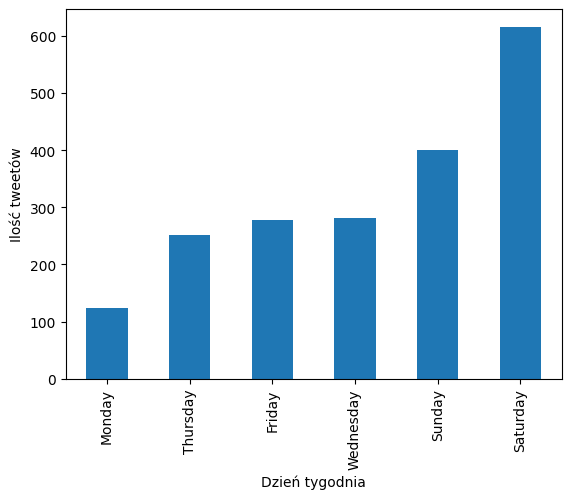

In [38]:
# 1

df2.plot(kind = "bar", ylabel = "Ilość tweetów", xlabel = "Dzień tygodnia")